# CS217 : Assignment 3  :  Reflectance and Photometric Stereo

---
Please edit the cell below to include your name and student ID #

**name:** Saad Manzur

**SID:** 83166813

# 1. Reflectance and Lighting Direction

You take an image of a sphere of radius $r$ whose center projects to image position (0, 0). To simplify things, we will assume that the sphere is far from the camera relative to the radius of the sphere and use an orthographic projection model $(x,y,z) \rightarrow (x,y)$ rather than our usual perspective model $(x,y,z) \rightarrow (x/z,y/z)$. The sphere is illuminated from above by a distant point light source. Let $(a,b)$ be the location of the brightest point on the sphere as seen by the camera where $a^2 + b^2 \leq r^2$ 

## 1.1  Lambertion Reflectance

Assume the sphere is a diffuse material and behaves as an ideal lambertian object. Find the direction of the point light source as a function of $(a,b)$. The direction is given by a unit length vector pointing from the center of the sphere toward the point light source. Hint: Express the equation for a sphere in terms of z to get a height field.


Since this is an ideal lambertian object, the brighter spot will only depend on the illumination direction and not the viewing direction. This condition will satisfy only when the angle between incident light and the surface normal is 0. Thus, the normal calculated at the incident point will give the light source direction. Now, since this is an orthographic projection that projects to z = 0 plane, all the points on the sphere will be multiplied by a matrix whose first two diagonal elements are 1 and 0 otherwise. Thus a 2d point on image (a,b) will have a 3d point on the sphere with $a, b, \sqrt{r^2 - a^2 - b^2}$ as z coordinate. Thus, the direction for the normal $(\frac{a}{r}, \frac{b}{r}, \frac{\sqrt{r^2 - a^2 - b^2}}{r})$

This can also be shown from writing down the equation of a sphere. The point $(a,b,c)$ is on sphere and $(h,k,l)$ is center.

$|| (a,b,c) - (h,k,l) || = r$
$ (a-h)^2 + (b-k)^2 + (c-l)^2 = r^2$
$ c = l + \sqrt{r^2 - (a-h)^2 - (b-k)^2} $

Now, the partial derivative with respect x and y gives us $ -\frac{\delta c}{\delta a} = \frac{a-h}{c-l} $ and $ -\frac{\delta c}{\delta b} = \frac{b-k}{c-l} $. So the normal at point $( -\frac{\delta c}{\delta a}, -\frac{\delta c}{\delta b}, 1 )$. After normalizing, we have the direction $( \frac{a-h}{r}, \frac{b-k}{r}, \frac{c-l}{r} )$

## 1.2  Specular Reflectance

Assume the sphere is chrome and behaves as a ideal reflector. Find the direction of the point light source as a
function of $(a,b)$

The specular component will be at its brightest when the viewing direction aligns with the reflected ray. Since our camera is looking down the z axis, then the direction of the viewer can be said $(0, 0, 1)$. Now, the direction of the incident light would be $(\vec{R} - 2\vec{N}(\vec{R}.\vec{N}))$

From, the first calculation, the normal at $(a,b)$ is $( \frac{a-h}{r}, \frac{b-h}{r}, \frac{c-l}{r} )$.

$(\vec{R}.\vec{N}) = (0, 0, 1).(\frac{a-h}{r}, \frac{b-k}{r}, \frac{c-l}{r} )$

Thus the incident light direction, $(0, 0, 1) - 2 \frac{c-l}{r} (\frac{a-h}{r}, \frac{b-k}{r}, \frac{c-l}{r}) = (-\frac{2(a-h)(c-l)}{r^2}, \frac{-2(b-k)(c-l)}{r^2}, 1 - \frac{2(c-l)^2}{r^2})$

And the direction of the light source is the opposite of this.

# 2. Lighting Recovery

Download the set of images provided on Canvas.  Write code that loads in each of the 11 chrome-ball images and determines the light source direction by finding the brightest point on the image and utilizing your derivation above. Represent the lighting direction by a unit vector pointing in the direction of the light source. Print out and visualize the resulting vectors in a plot and verify that they match your intuition from looking at the images.

In [2]:
%matplotlib notebook
import glob
import cv2 as opencv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def findLightDirection():
    fig = plt.figure(figsize=(8,6))
    
    mask = opencv.imread('data/chrome/chrome.mask.png')
    gmask = opencv.cvtColor(mask, opencv.COLOR_BGR2GRAY)
    circles = opencv.HoughCircles(gmask,opencv.HOUGH_GRADIENT,1,20,
                                  param1=50,param2=30,minRadius=100,maxRadius=0)
    
    center = circles[0,0,:2]
    radius = circles[0,0,2]
    
    brightestPts = []
    for i in range(12):
        img = opencv.imread('data/chrome/chrome.'+str(i)+'.png')
        gray = opencv.cvtColor(img, opencv.COLOR_BGR2GRAY)
        #img = opencv.bitwise_and(img, mask)
        
        brightest = np.unravel_index(np.argmax(gray), gray.shape)
        brightestPts.append(brightest)
        
        opencv.circle(img, (brightest[1], brightest[0]), 5, (255, 0, 0), -1)
        opencv.circle(img, (center[0], center[1]), radius, (255, 0, 0), 3)
        subfig = fig.add_subplot(4,3,i+1)
        subfig.imshow(img)
        
    return center[0], center[1], radius, np.array(brightestPts)


<IPython.core.display.Javascript object>


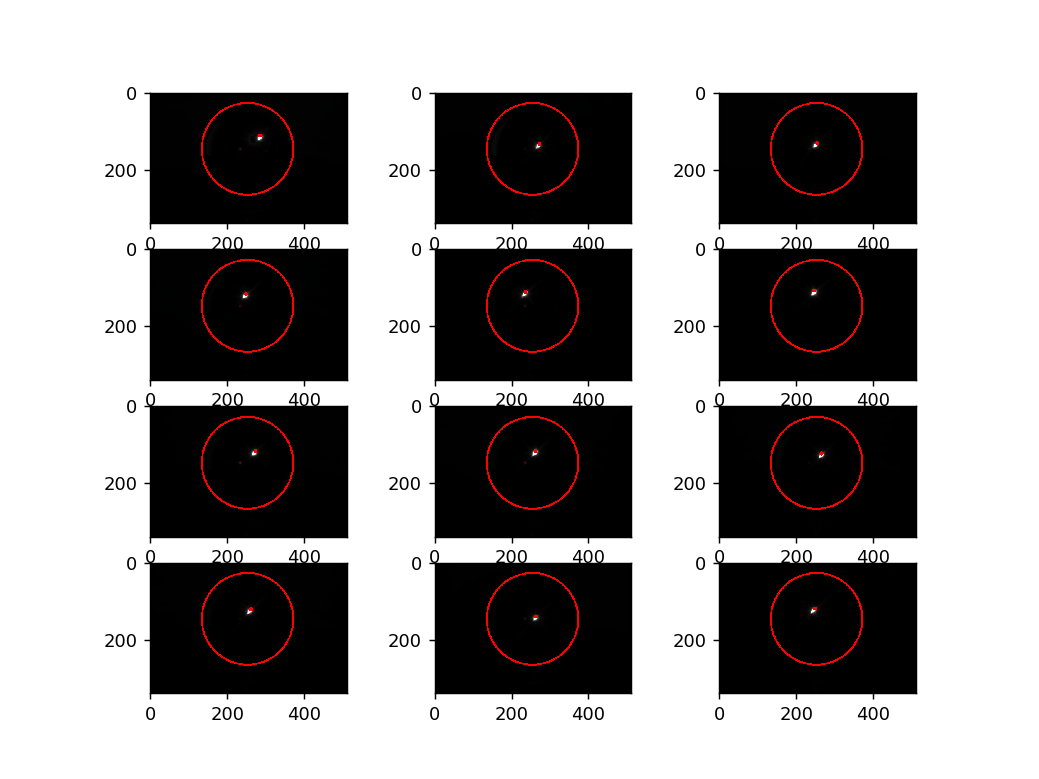

In [4]:
cx, cy, radius, brightestPts = findLightDirection()

<IPython.core.display.Javascript object>


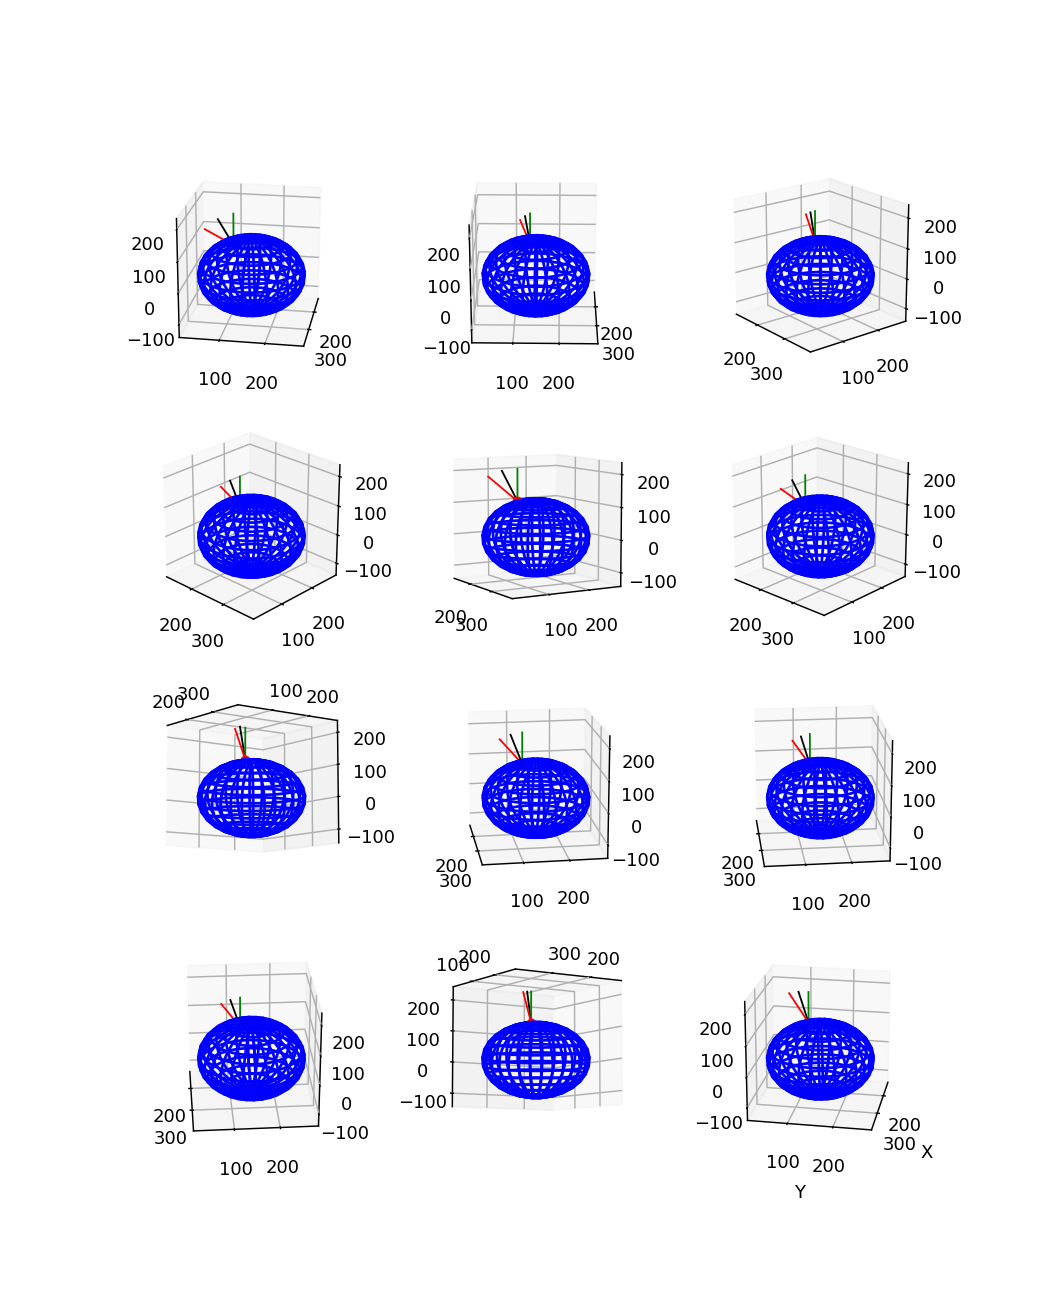

Text(0.5, 0, 'Y')

In [73]:
lightSourceDirections = []

fig = plt.figure(figsize=(8,10))
for i in range(brightestPts.shape[0]):
    subfig = fig.add_subplot(4,3,i+1, projection='3d')
    subfig.set_aspect("equal")
    #subfig.view_init(azim=-85,elev=85)

    theta, phi = np.mgrid[0:np.pi:15j, 0:2*np.pi:30j]
    x = cx + radius*np.cos(theta)*np.sin(phi)
    y = cy + radius*np.sin(theta)*np.sin(phi)
    z = radius*np.cos(phi)
    subfig.plot_wireframe(x, y, z, color='b')
    
    a = brightestPts[i,1]
    b = brightestPts[i,0]
    c = np.sqrt(radius**2 - (brightestPts[i,1] - cx)**2 - (brightestPts[i,0] - cy)**2)
    subfig.scatter([a], [b], [c], color='r')
    
    normal = np.zeros((1,3))
    normal[0,0] = (a - cx) / radius
    normal[0,1] = (b - cy) / radius
    normal[0,2] = c / radius
    
    normal_line = [[a, b, c]] + 100*normal
    subfig.plot([a, normal_line[0,0]], 
                [b, normal_line[0,1]], 
                [c, normal_line[0,2]], color='k', linestyle='-', linewidth=1)
    
    view = np.array([[a, b, c]]) + 100*np.array([[0, 0, 1]])
    subfig.plot([a, view[0,0]], 
                [b, view[0,1]], 
                [c, view[0,2]], color='g', linestyle='-', linewidth=1)
    
    incident = np.zeros((1,3))
    incident[0,0] = (2 * (a-cx) * c)/(radius**2)
    incident[0,1] = (2 * (b-cy) * c)/(radius**2)
    incident[0,2] = -(1 - (2*c**2/radius**2))
    incident = incident/np.linalg.norm(incident)
    
    lightSourceDirections.append(incident)
    
    light = np.array([[a, b, c]]) + 100*incident
    subfig.plot([a, light[0,0]], 
                [b, light[0,1]], 
                [c, light[0,2]], color='r', linestyle='-', linewidth=1)
    
lightSourceDirections = np.array(lightSourceDirections)
    
plt.xlabel("X")
plt.ylabel("Y")


The Red line is the direction of the light source, black line is the normal direction and green line is the view direction.

# 3. Photometric Stereo

There are a second collection of images of a lambertian object taken with the same lighting configuration as was used for the chrome sphere.  We would like to recover its shape.  

For a lambertian object with albedo $\rho$ we expect the measured intensity in the image $I(x,y)$ to be proportional to $\rho(x,y) N(x,y)^T S_i$ where $S_i$ is the lighting direction and $N(x,y)$ is the normal.  In the case of a color image we have such an equation for the red, green and blue channels with corresponding albedos $\rho_r, \rho_g, \rho_b$.  We will assume the light sources have been calibrated so that their intensity is constant across all images $\|S_i\|=1$.  

Using only the red-channel images, find the least squares solution for the normal vector and red albedo image.  Specifically, for each pixel $(x,y)$ compute $\arg\min_g \sum_{i=1}^{11} \|R_i - g^T S_i\|^2$ where $g$ will contain both albedo and normal information (i.e.  $g = \rho_r N$). 

You will need to ignore pixels in shadow since they are not directly illuminated by the source.  You can do this by either choosing a threshold criteria to remove shadowed pixels from the least squares problem or by performing a weighted-least squares estimate where the weighting is some function of the intensity.  Visualize the resulting vectors $g(x,y)$ as a 3D plot using **pyplot.quiver**.  When producing visualizations, you can make use of the provided masks to avoid plotting points outside the object.


<IPython.core.display.Javascript object>


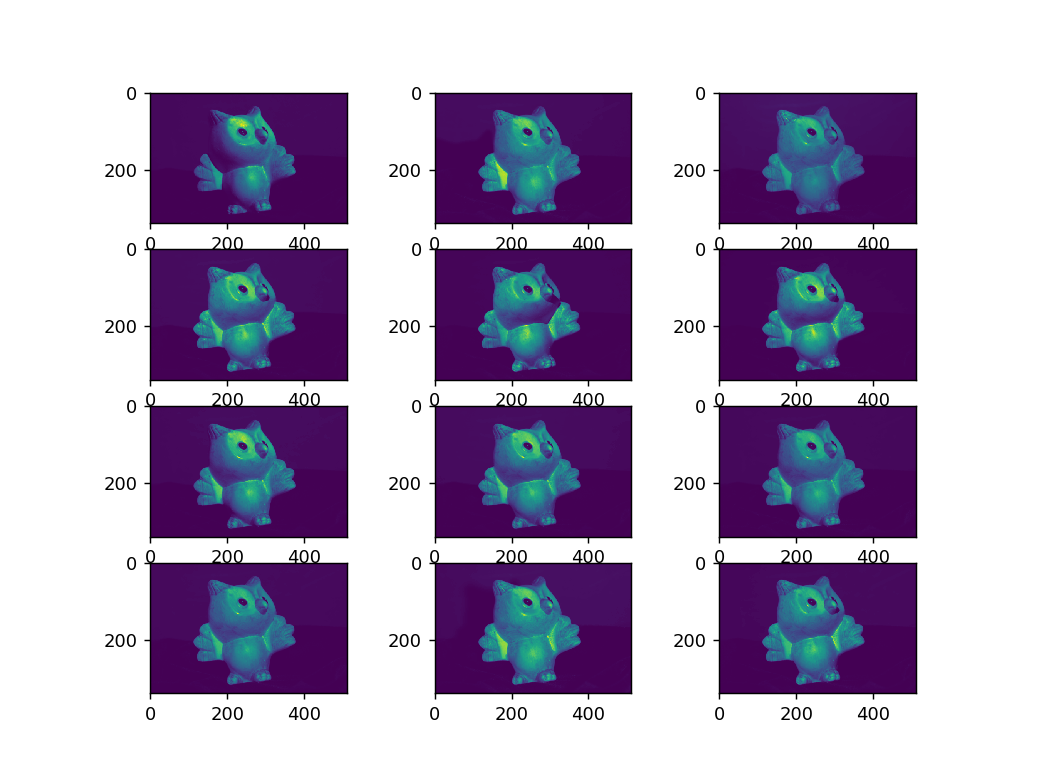

In [12]:
fig = plt.figure(figsize=(8,6))

mask = opencv.imread('data/owl/owl.mask.png')

images = []

for i in range(12):
    subfig = fig.add_subplot(4,3,i+1)
    img = opencv.imread('data/owl/owl.' +  str(i) + '.png')
    img = opencv.cvtColor(img, opencv.COLOR_BGR2RGB)
    
    
    redChannel = img[:,:,0]
    
    subfig.imshow(img[:,:,0])
    
    images.append(redChannel)
    
images = np.array(images)
    
plt.show()

In [56]:
def getNormals(images, mask, lightSourceDirections):
    normals = np.zeros((mask.shape[0], mask.shape[1], 3))

    lightSourceDirections = lightSourceDirections.reshape((12,3))

    threshold = 20
    
    for x in range(mask.shape[0]):
        for y in range(mask.shape[1]):
            sourceIndices = np.argwhere(images[:,x,y] > threshold)
            if sourceIndices.shape[0] == 0:
                continue
            #print(sourceIndices)
            weightedR = images[:,x,y][sourceIndices]
            #print(weightedR.shape)
            weightedLight = lightSourceDirections[sourceIndices].reshape(
                sourceIndices.shape[0], 3)
            #print(lightSourceDirections.shape)
            normal, residuals, rank, s = np.linalg.lstsq(weightedLight, 
                                                         weightedR,
                                                         rcond=None)

            normals[x,y,0] = normal[0,0]
            normals[x,y,1] = normal[1,0]
            normals[x,y,2] = normal[2,0]
    
    return normals

normals = getNormals(images, mask, lightSourceDirections)

In [57]:
normalsToPlot = np.zeros(normals.shape)

for x in range(mask.shape[0]):
    for y in range(mask.shape[1]):
        if mask[x,y,0] == 255:
            normalsToPlot[x,y,:] = normals[x,y,:]#/np.linalg.norm(normals[x,y,:])
        


<IPython.core.display.Javascript object>


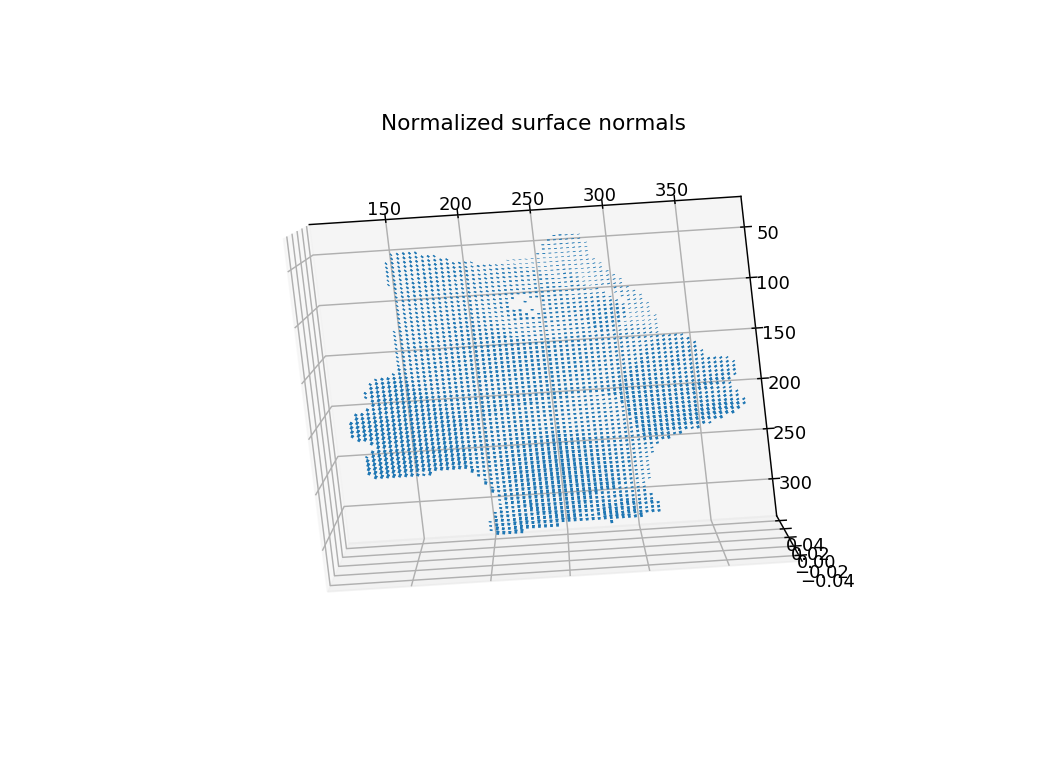

Text(0.5, 0.92, 'Normalized surface normals')

In [66]:
fig = plt.figure(figsize=(8,6))
subfig = fig.add_subplot(111, projection='3d')

x, y, z = np.meshgrid(np.linspace(0,normalsToPlot.shape[1],normalsToPlot.shape[1]),
                      np.linspace(0,normalsToPlot.shape[0],normalsToPlot.shape[0]),
                      np.zeros((1,1))
                     )

sliceInterval = 4

expandedNormals = np.expand_dims(normalsToPlot, axis=2)

subfig.quiver(x[::sliceInterval,::sliceInterval], 
              y[::sliceInterval,::sliceInterval], 
              z[::sliceInterval,::sliceInterval], 
              expandedNormals[::sliceInterval,::sliceInterval,:,0],
              expandedNormals[::sliceInterval,::sliceInterval,:,1],
              expandedNormals[::sliceInterval,::sliceInterval,:,2],
              normalize=True, length=0.01
             )
subfig.view_init(elev=-85, azim=-85)

plt.title("Normalized surface normals")

# 3. Albedo Recovery

Use your code in problem 3 to independently estimate $g$ for each of the color channels.  The $g$ vectors you recover from the three channels should have different lengths (depending on the color of the surface) but the same
direction (depending only on the shape of the surface).  Use this fact to generate an image that shows the color albedo $(\rho_r,\rho_g,\rho_b)$ at each pixel and a quiver plot showing unit normal vectors describing the shape.


In [59]:
mask = opencv.imread('data/owl/owl.mask.png')

reds = []
blues = []
greens = []

for i in range(12):
    img = opencv.imread('data/owl/owl.' +  str(i) + '.png')
    img = opencv.cvtColor(img, opencv.COLOR_BGR2RGB)
    
    redChannel = img[:,:,0]
    greenChannel = img[:,:,1]
    blueChannel = img[:,:,2]
    
    reds.append(redChannel)
    blues.append(blueChannel)
    greens.append(greenChannel)
    
reds = np.array(reds)
blues = np.array(blues)
greens = np.array(greens)
    
rNormals = getNormals(reds, mask, lightSourceDirections)
gNormals = getNormals(greens, mask, lightSourceDirections)
bNormals = getNormals(blues, mask, lightSourceDirections)

rhoR = np.linalg.norm(rNormals, axis=2)
rhoG = np.linalg.norm(gNormals, axis=2)
rhoB = np.linalg.norm(bNormals, axis=2)

<IPython.core.display.Javascript object>


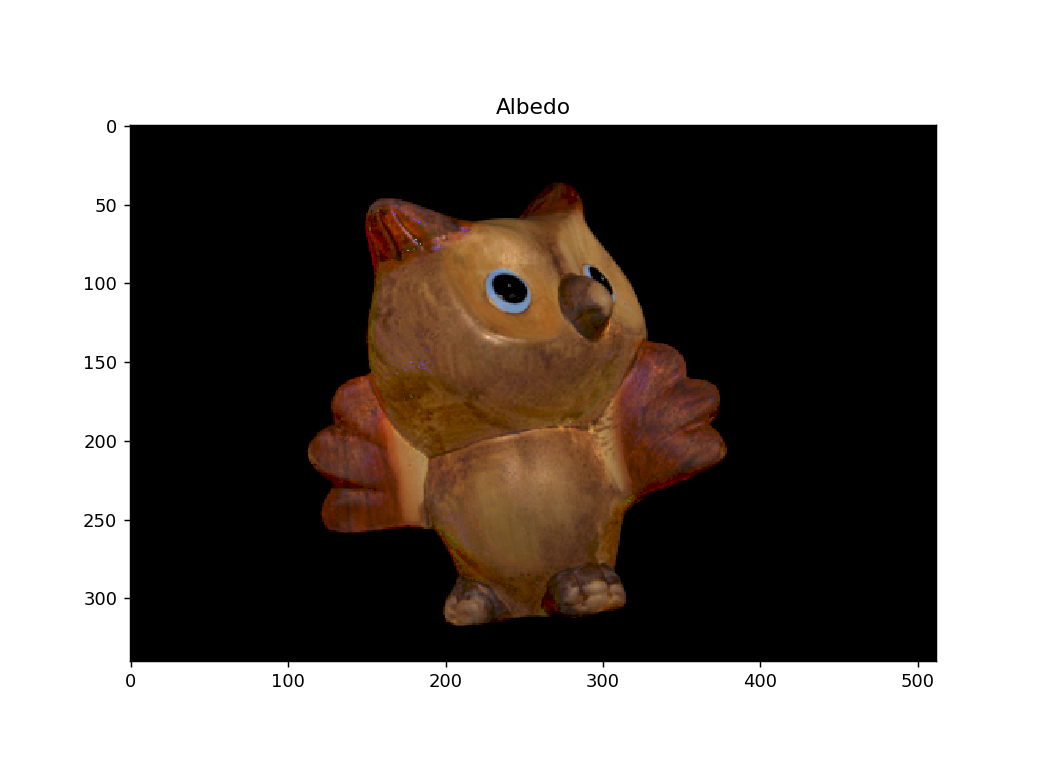

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Albedo')

In [60]:
constructedImage = np.zeros((rhoR.shape[0], rhoR.shape[1], 3))

constructedImage[:,:,0] = rhoR/255
constructedImage[:,:,1] = rhoG/255
constructedImage[:,:,2] = rhoB/255

fig = plt.figure(figsize=(8,6))
subfig = fig.add_subplot(111)
subfig.imshow(constructedImage)
plt.title("Albedo")

/home/saad/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


<IPython.core.display.Javascript object>


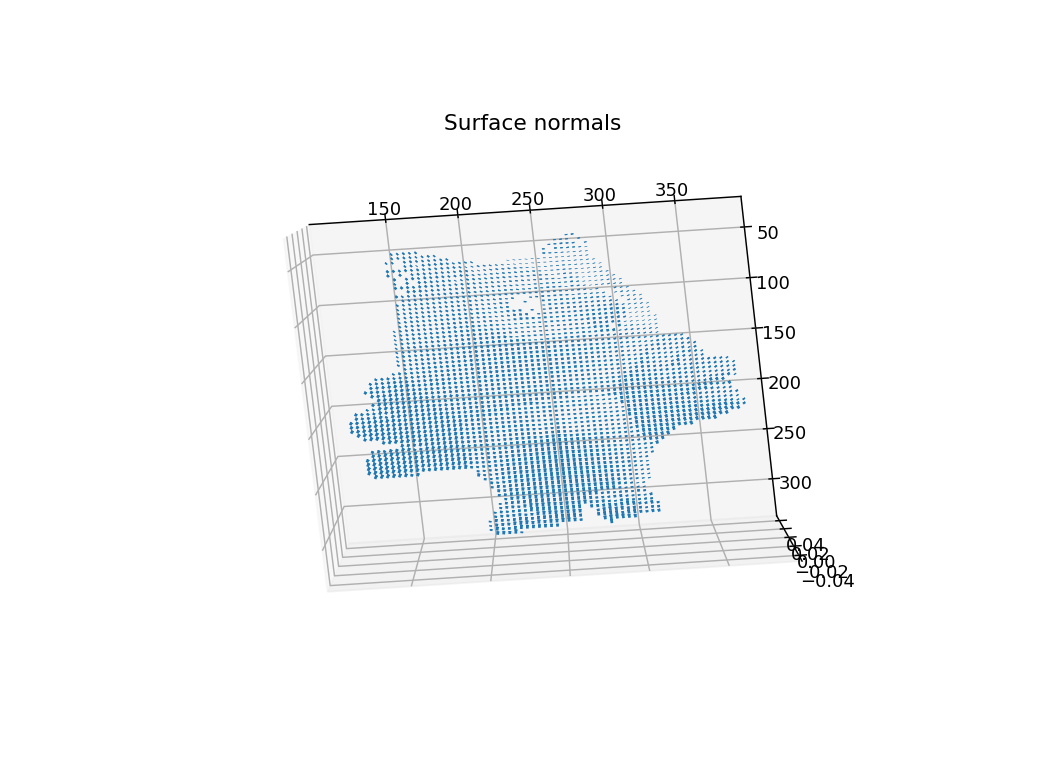

Text(0.5, 0.92, 'Surface normals')

In [65]:
normalDir = np.zeros(rNormals.shape)

for x in range(mask.shape[0]):
    for y in range(mask.shape[1]):
        if mask[x,y,0] == 255:
            normalDir[x,y,:] = gNormals[x,y,:]/np.linalg.norm(gNormals[x,y,:])

fig = plt.figure(figsize=(8,6))
subfig = fig.add_subplot(111, projection='3d')

x, y, z = np.meshgrid(np.linspace(0,normalDir.shape[1],normalDir.shape[1]),
                      np.linspace(0,normalDir.shape[0],normalDir.shape[0]),
                      np.zeros((1,1))
                     )

sliceInterval = 4

expandedNormals = np.expand_dims(normalDir, axis=2)

subfig.quiver(x[::sliceInterval,::sliceInterval], 
              y[::sliceInterval,::sliceInterval], 
              z[::sliceInterval,::sliceInterval], 
              expandedNormals[::sliceInterval,::sliceInterval,:,0],
              expandedNormals[::sliceInterval,::sliceInterval,:,1],
              expandedNormals[::sliceInterval,::sliceInterval,:,2],
              length=0.01, normalize=True
             )

subfig.view_init(elev=-85, azim=-85)

plt.title("Surface normals")